# Piyush Yadav 23/CS/301
# Lab 05– Classification Models &amp; Ensemble Evaluation

## Task 1: Load the Dataset

In this step, we loaded the `churn.csv` dataset into a pandas DataFrame to begin our analysis. This allows us to access and manipulate the data for building our classification models.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('churn.csv')

# Display the first few rows of the DataFrame
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Task 2: Preprocess the Data

Data preprocessing is crucial for preparing the data for machine learning models. In this task, we performed the following steps:

1.  **Dropped the 'customerID' column**: This column is a unique identifier and not relevant for model training.
2.  **Converted 'TotalCharges' to numeric**: This column was initially of object type and needed to be converted to a numerical format for calculations. We used `errors='coerce'` to handle any non-numeric values by converting them to `NaN`.
3.  **Separated the target variable**: We split the data into features (`X`) and the target variable (`y`), which is 'Churn'. We also converted the 'Churn' column to a numerical format (0 for 'No', 1 for 'Yes').
4.  **Identified categorical and numerical features**: We distinguished between categorical and numerical columns to apply appropriate preprocessing techniques.
5.  **Created preprocessing pipelines**: We built separate pipelines for numerical features (imputing missing values with the median and scaling using `StandardScaler`) and categorical features (`OneHotEncoder` to convert categorical variables into a numerical format).
6.  **Combined preprocessing steps**: We used `ColumnTransformer` to apply the defined pipelines to the respective feature types.
7.  **Applied preprocessing and split data**: We applied the preprocessing steps to the features and then split the processed data into training and testing sets using `train_test_split`. This allows us to train the models on a portion of the data and evaluate their performance on unseen data.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Drop customerID column as it is not useful for modeling
df = df.drop('customerID', axis=1)

# Convert 'TotalCharges' to numeric, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Separate target variable
X = df.drop('Churn', axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Convert target to numeric

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing and split data
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Data preprocessing complete. Training and testing sets created.")

Data preprocessing complete. Training and testing sets created.


## Task 3: Train Models

With the preprocessed data, we trained two different classification models:

1.  **Logistic Regression**: A linear model used for binary classification.
2.  **Decision Tree**: A tree-based model that splits the data based on features to make predictions.

We fit both models to the training data (`X_train`, `y_train`).

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("Models trained.")

Models trained.


## Task 4 & 5: Evaluate and Compare Models

After training the models, we evaluated their performance using several metrics and compared them:

1.  **Accuracy**: The proportion of correctly classified instances.
2.  **ROC AUC (Receiver Operating Characteristic Area Under the Curve)**: A measure of the model's ability to distinguish between the two classes. A higher ROC AUC indicates better performance.
3.  **Confusion Matrix**: A table that summarizes the performance of a classification model, showing the counts of true positives, true negatives, false positives, and false negatives.

We calculated these metrics for both models and presented the accuracy and ROC AUC in a pandas DataFrame for easy comparison. We also visualized the ROC curves and confusion matrices to provide a comprehensive view of the models' performance.

Based on the evaluation, the Logistic Regression model showed better performance with higher accuracy and ROC AUC.

Logistic Regression Accuracy: 0.8219
Logistic Regression ROC AUC: 0.8622
Logistic Regression Confusion Matrix:
[[934 102]
 [149 224]]

Decision Tree Accuracy: 0.7161
Decision Tree ROC AUC: 0.6443
Decision Tree Confusion Matrix:
[[827 209]
 [191 182]]


,Model,Accuracy,ROC AUC
0,Logistic Regression,0.821859,0.862175
1,Decision Tree,0.716111,0.644253


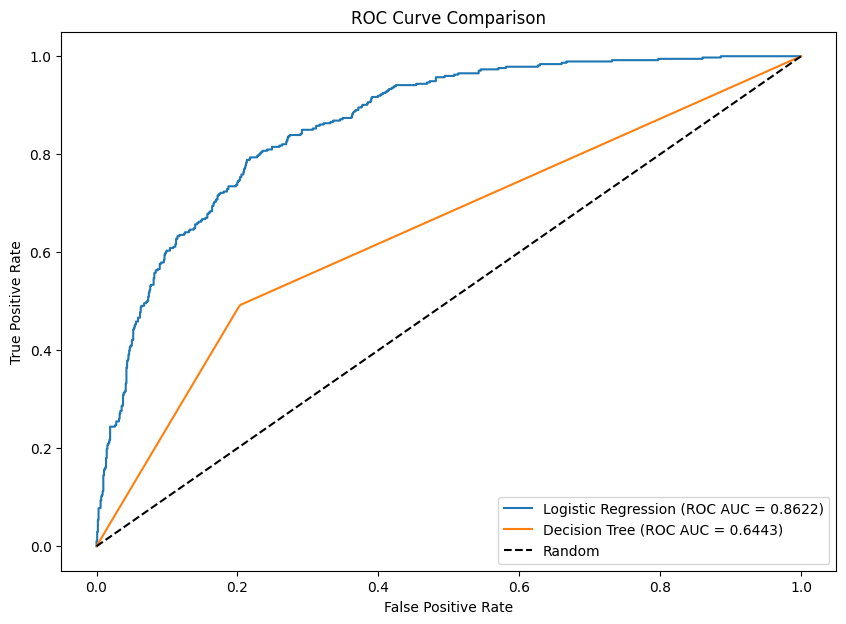

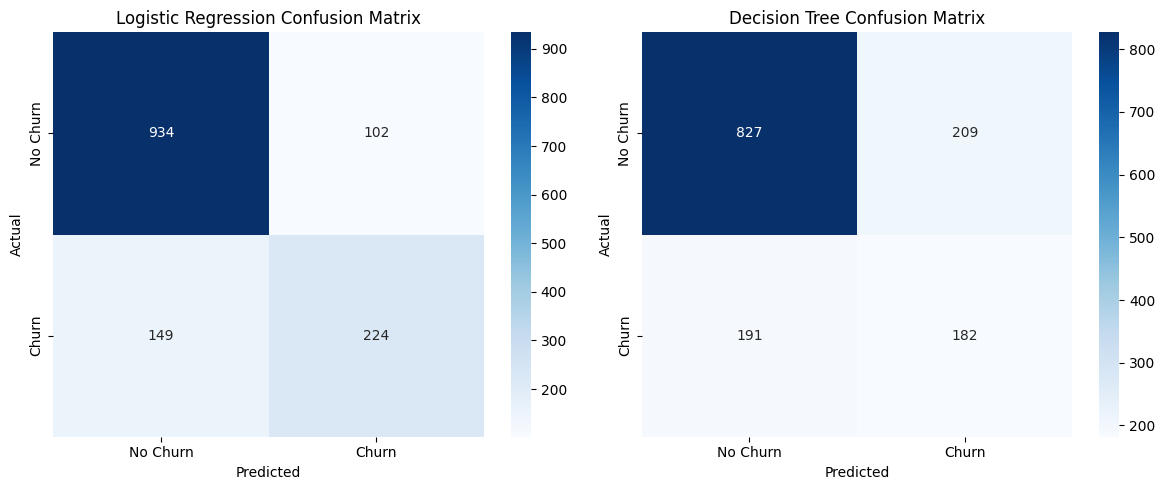

In [4]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression ROC AUC: {roc_auc_lr:.4f}")
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_lr)

# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"\nDecision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree ROC AUC: {roc_auc_dt:.4f}")
print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)

# Store evaluation results in a DataFrame
comparison_data = {'Model': ['Logistic Regression', 'Decision Tree'],
                   'Accuracy': [accuracy_lr, accuracy_dt],
                   'ROC AUC': [roc_auc_lr, roc_auc_dt]}
comparison_df = pd.DataFrame(comparison_data)

display(comparison_df)

# Plot ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (ROC AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (ROC AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['No Churn', 'Churn'])
axes[0].set_yticklabels(['No Churn', 'Churn'])

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['No Churn', 'Churn'])
axes[1].set_yticklabels(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

## Task 6: Save the Best Model

Since the Logistic Regression model performed better, we saved it as the best model using the `joblib` library. This allows us to easily load and use the trained model later for making predictions on new data without retraining.

In [5]:
import joblib

# Save the best model (Logistic Regression)
best_model = lr_model
joblib.dump(best_model, 'best_model.pkl')

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


## Task 7: Finish Task

We have successfully completed the task of building and evaluating classification models for churn prediction. We loaded and preprocessed the data, trained Logistic Regression and Decision Tree models, evaluated their performance, and saved the best-performing model.